In [ ]:
# import
import torch
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import random
import seaborn as sns; sns.set()


from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.manifold import TSNE
from sklearn import decomposition
from sklearn.cluster import SpectralClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering,AffinityPropagation,SpectralClustering
from sklearn import preprocessing
from sklearn import metrics
import datetime
from datetime import datetime
import time

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# seed
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [ ]:
# data
# df=pd.read_csv('/content/Батч 1.xlsx')

# batch_nornal - предобработанный бач данных, с нужными фичами
df=pd.read_csv('/content/Batch1.csv',parse_dates=True)
df=df.iloc[:30000,:]
data_property=['untreated','normal']
flag=data_property[0]
if df.shape[1]==26:
  flag=data_property[1]

In [ ]:
# df2=pd.read_csv('/content/select_p_hid_p_dt_p_sender_index_p_re (1).csv')

In [ ]:
# df_2=pd.read_excel('/content/select_p_hid_p_dt_p_sender_index_p_re (1).csv',parse_dates=True)

In [ ]:
df.head(n=5)

,Unnamed: 0,hid,data,sender_index,recipient_index,weight,cost,summa_OTS,summa_NP,blank_dispatch,parcel_post,accelerated,international,with_advert_value,with_imposition_payment,with_list_of_attachments,caution_mark,sms for sender,sms for recipient,ts
0,0,17279630-2e29-4a0d-8f96-f3c932e6bbcb,2020-07-05 00:00:26.036,109469,107241,100.0,173.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1593907226
1,1,16971e43-728a-4f66-a93c-3678aa8433cd,2020-07-05 00:03:17.229,390039,125284,1100.0,238.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1593907397
2,2,16d739fa-ca72-4b12-b8a1-ae5d91df945f,2020-07-05 00:11:47.671,111250,670033,100.0,173.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,1593907907
3,3,8182829,2020-07-05 00:12:50.965,105173,183035,2262.0,363.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1593907970
4,4,1645b790-f6f9-4c3f-b92b-eae34e781784,2020-07-05 00:13:05.474,195197,184209,1905.0,338.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1593907985


In [ ]:
# Подготовка данных, если загружаются сырые данные
if flag=='untreated':
  df.rename(columns={'дата оформления': 'data', 'индекс отправителя': 'sender_index',
                   'индекс получателя': 'recipient_index','вес (гр)': 'weight','стоимость (руб,коп)': 'cost',
                   'сумма ОЦ (руб)': 'summa_OTS', 'сумма НП (руб)':'summa_NP',
                   'безбланковая отправка':'blank_dispatch','бандероль':'parcel_post',
                   'ускоренное':'accelerated','международное':'international','с объявл. ценностью':'with_advert_value',
                   'с налож. платежом':'with_imposition_payment','с описью вложений':'with_list_of_attachments',
                   "отметка 'Осторожно'":'caution_mark','sms для отправителя':'sms for sender','sms для получателя':'sms for recipient'}, inplace=True)
  df=df.fillna(0)
  df["blank_dispatch"] = df["blank_dispatch"].astype(int)
  df["parcel_post"] = df["parcel_post"].astype(int)
  df["accelerated"] = df["accelerated"].astype(int)
  df["international"] = df["international"].astype(int)
  df["with_advert_value"] = df["with_advert_value"].astype(int)
  df["with_imposition_payment"] = df["with_imposition_payment"].astype(int)
  df["with_list_of_attachments"] = df["with_list_of_attachments"].astype(int)
  df["caution_mark"] = df["caution_mark"].astype(int)
  df["sms for sender"] = df["with_imposition_payment"].astype(int)
  df["sms for recipient"] = df["sms for recipient"].astype(int)
  df['data'] = pd.to_datetime(df['data'], errors='coerce')
  df['ts'] = df.data.values.astype(np.int64) // 10 ** 9
  df['mean_user_cost']=''
  df['count_sum']=''
  df['max_data']=''
  df['ts_delta']=''
  df['sum_cost']=''


In [ ]:
if flag=='untreated':
  dict_count=df.groupby(['hid'])['data'].count().to_dict()
  dict_max_data=df.groupby(['hid'])['ts'].apply(list).apply(np.max).to_dict()
  dict_ts_delta=df.groupby('hid')['cost'].apply(list).apply(np.mean).apply(np.mean).to_dict()
  dict_mean_cost=df.groupby('hid')['cost'].apply(list).apply(np.mean).to_dict()
  dict_sum_cost=df.groupby('hid')['cost'].apply(list).apply(np.sum).to_dict()
  iter=0
  for i in df.hid:
    df.loc[df['hid']==i,'mean_user_cost']=dict_mean_cost[i]
    df.loc[df['hid']==i,'count_sum']=dict_count[i]
    df.loc[df['hid']==i,'max_data']=dict_max_data[i]
    df.loc[df['hid']==i,'ts_delta']=dict_ts_delta[i]
    df.loc[df['hid']==i,'sum_cost']=dict_sum_cost[i]
    iter+=1
    print(iter)
  df=df.replace('',0)
  df["mean_user_cost"] = df["mean_user_cost"].astype(float)
  df["count_sum"] = df["count_sum"].astype(int)
  df["max_data"] = df["max_data"].astype(int)
  df["ts_delta"] = df["ts_delta"].astype(int)
  df["sum_cost"] = df["sum_cost"].astype(float)


Выходные данные были обрезаны до нескольких последних строк (5000).
25002
25003
25004
25005
25006
25007
25008
25009
25010
25011
25012
25013
25014
25015
25016
25017
25018
25019
25020
25021
25022
25023
25024
25025
25026
25027
25028
25029
25030
25031
25032
25033
25034
25035
25036
25037
25038
25039
25040
25041
25042
25043
25044
25045
25046
25047
25048
25049
25050
25051
25052
25053
25054
25055
25056
25057
25058
25059
25060
25061
25062
25063
25064
25065
25066
25067
25068
25069
25070
25071
25072
25073
25074
25075
25076
25077
25078
25079
25080
25081
25082
25083
25084
25085
25086
25087
25088
25089
25090
25091
25092
25093
25094
25095
25096
25097
25098
25099
25100
25101
25102
25103
25104
25105
25106
25107
25108
25109
25110
25111
25112
25113
25114
25115
25116
25117
25118
25119
25120
25121
25122
25123
25124
25125
25126
25127
25128
25129
25130
25131
25132
25133
25134
25135
25136
25137
25138
25139
25140
25141
25142
25143
25144
25145
25146
25147
25148
25149
25150
25151
25152
25153
25154
25155
25156
25

In [ ]:
# создание метрик
# if flag=='untreated':
df['activity'] = df.count_sum/df.count_sum.mean() + df.ts_delta.mean()/df.ts_delta + ((df.max_data-df.ts)/df.ts_delta.mean())
df['solvency']=df.sum_cost/df.sum_cost.mean()+df.mean_user_cost/df.mean_user_cost.mean()+df.accelerated*0.2+df.with_advert_value+0.1+df.with_imposition_payment*0.1
max_act=df['activity'].max()
max_solv=df['solvency'].max()
df['activity']=df['activity']/max_act*100

df['solvency']=df['solvency']/max_solv*10

In [ ]:
df.mean_user_cost.mean()

400.6803136666656

In [ ]:
df.solvency.max()

10.0

In [ ]:
df.activity.max()

In [ ]:
df.head()

,Unnamed: 0,hid,data,sender_index,recipient_index,weight,cost,summa_OTS,summa_NP,blank_dispatch,parcel_post,accelerated,international,with_advert_value,with_imposition_payment,with_list_of_attachments,caution_mark,sms for sender,sms for recipient,ts,mean_user_cost,count_sum,max_data,ts_delta,sum_cost,activity,solvency
0,0,17279630-2e29-4a0d-8f96-f3c932e6bbcb,2020-07-05 00:00:26.036,109469,107241,100.0,173.0,0.0,0.0,0,0,1,0,0,0,0,0,0,0,1593907226,173.0,3,1593908483,173,519.0,0.574012,0.589201
1,1,16971e43-728a-4f66-a93c-3678aa8433cd,2020-07-05 00:03:17.229,390039,125284,1100.0,238.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,1593907397,238.0,1,1593907397,238,238.0,0.177506,0.530563
2,2,16d739fa-ca72-4b12-b8a1-ae5d91df945f,2020-07-05 00:11:47.671,111250,670033,100.0,173.0,0.0,0.0,1,0,1,0,0,0,0,0,0,0,1593907907,183.5,2,1593979001,183,367.0,18.310989,0.591362
3,3,8182829,2020-07-05 00:12:50.965,105173,183035,2262.0,363.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1593907970,311.0,4,1593947921,311,1244.0,10.313781,0.774597
4,4,1645b790-f6f9-4c3f-b92b-eae34e781784,2020-07-05 00:13:05.474,195197,184209,1905.0,338.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,1593907985,313.0,2,1593907985,313,626.0,0.142772,0.709614


In [ ]:
df.cost.sum()

12020409.41

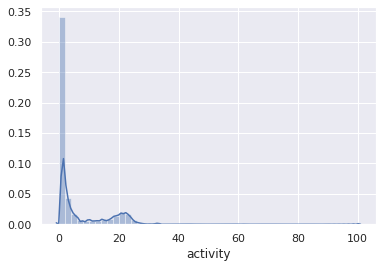

In [ ]:
sns_plot = sns.distplot(df['activity'])
fig = sns_plot.get_figure()

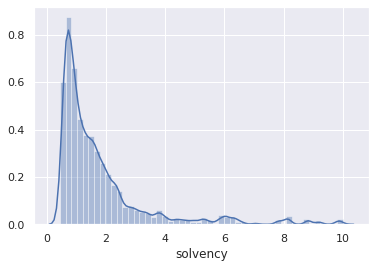

In [ ]:
sns_plot = sns.distplot(df['solvency'])
fig = sns_plot.get_figure()

In [ ]:
# Описание всего датасета
df.describe()

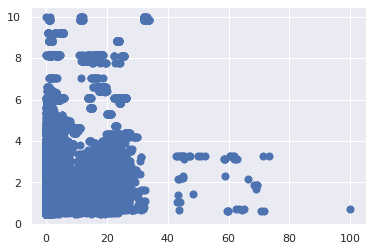

In [ ]:
plt.scatter(df.loc[:, 'activity'], df.loc[:, 'solvency'], s = 50);
plt.show()

In [ ]:
df.sum_cost.sum()

196301239.63

In [ ]:
if flag=='untreated':
  df.to_csv('/content/Batch_normal.csv')

In [ ]:
X_sourse=df.iloc[:30000,4:28]
# X_sourse=df.iloc[:10000,[4,5,6,7,8,9,10,23,22,21,20,19]]
# std and norl
# X_sourse=X_sourse.drop('ts',axis=1)
# X_sourse=X_sourse.drop('max_data',axis=1)
X = preprocessing.scale(X_sourse)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [ ]:
X_sourse.describe()

,recipient_index,weight,cost,summa_OTS,summa_NP,blank_dispatch,parcel_post,accelerated,international,with_advert_value,with_imposition_payment,with_list_of_attachments,caution_mark,sms for sender,sms for recipient,ts,mean_user_cost,count_sum,max_data,ts_delta,sum_cost,activity,solvency
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.0,30000.000000,30000.0,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000
mean,413138.978367,1778.872267,400.680314,676.895033,575.976767,0.718533,0.0,0.181933,0.0,0.261367,0.142567,0.009933,0.004400,0.142567,0.093067,1.593997e+09,400.680314,16.178733,1.594013e+09,400.338600,6543.374654,4.423390,1.752174
std,201571.990938,2649.349722,270.425535,1914.970235,1792.621965,0.449722,0.0,0.385796,0.0,0.439387,0.349636,0.099172,0.066188,0.349636,0.290531,3.716182e+04,210.162520,29.071594,3.295150e+04,210.109513,12073.829355,7.742913,1.591505
min,101000.000000,0.000000,173.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.593907e+09,173.000000,1.000000,1.593907e+09,173.000000,173.000000,0.014201,0.445905
25%,196233.000000,300.000000,263.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.593961e+09,275.000000,2.000000,1.593989e+09,275.000000,792.000000,0.176785,0.784422
50%,400082.000000,800.000000,313.120000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.594016e+09,343.733333,6.000000,1.594029e+09,343.000000,2102.130000,0.566716,1.229042
75%,628611.000000,2000.000000,457.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.594030e+09,472.615385,15.000000,1.594034e+09,472.000000,5894.400000,3.440317,1.994617
max,694923.000000,20000.000000,5152.800000,45350.000000,45350.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.594301e+09,5152.800000,177.000000,1.594301e+09,5152.000000,72182.390000,100.000000,10.000000


In [ ]:
pca = decomposition.PCA(n_components=2)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

In [ ]:
# если не жалко время, то можно и этот метод
#  t-SNE and PCA
# tsne = TSNE(random_state=17)
# X_tsne = tsne.fit_transform(X)

In [ ]:
# plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s = 50);
# plt.show()

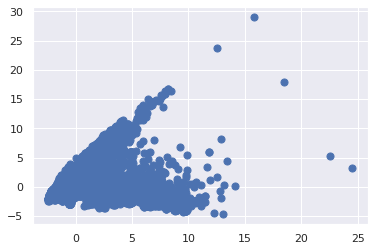

In [ ]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], s = 50);
plt.show()

In [ ]:
# algoritms
# подбор алгоритма  и сравнение их
# algorithms = []
# algorithms.append(KMeans(n_clusters = 2,n_init = 100,random_state=17 ))
# algorithms.append(AgglomerativeClustering(n_clusters = 2))
# algorithms.append(SpectralClustering(n_clusters=2, random_state=1,
#                                      affinity='nearest_neighbors'))
# # algorithms.append(DBSCAN(eps=0.1, min_samples=5))
# # algorithms.append(AffinityPropagation())

# data = []
# for algo in algorithms:
#     algo.fit(X)
#     print(algo)
#     data.append(({
#         # 'ARI': metrics.adjusted_rand_score(y, algo.labels_),
#         # 'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
#         # 'Homogenity': metrics.homogeneity_score(y, algo.labels_),
#         # 'Completeness': metrics.completeness_score(y, algo.labels_),
#         # 'V-measure': metrics.v_measure_score(y, algo.labels_),
      
#         'Silhouette': metrics.silhouette_score(X, algo.labels_)}))
# results = pd.DataFrame(data=data, columns=['Silhouette'], index=['K-means', 'Agglomerative','Spectral'])
# results

In [ ]:
#  подбор оптимального количества сегментов
# loss=[]
# for k in range(2, 10):
#     kmeans = KMeans(n_clusters=k,n_init = 100,random_state=1).fit(X)
#     loss_current=metrics.silhouette_score(X, kmeans.labels_)
#     loss.append(loss_current)

# plt.plot(range(2, 10), loss, marker='s');
# plt.xlabel('$k$')
# plt.ylabel('$J(C_k)$');

In [ ]:
#  обучение моделей
kmeans = KMeans(n_clusters = 3,n_init = 100,random_state=17 ).fit(X)
# sc = SpectralClustering(n_clusters=3, random_state=1, affinity='nearest_neighbors').fit(X)
# ac2 = AgglomerativeClustering(n_clusters = 3).fit(X)
# clustering = DBSCAN(eps=0.1, min_samples=5).fit(X)

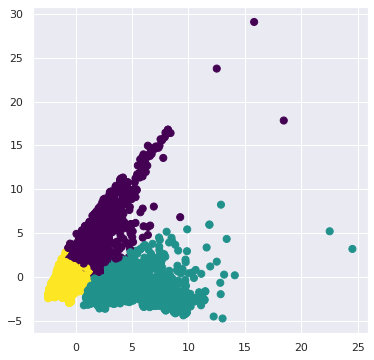

In [ ]:
# KMeans
plt.figure(figsize =(6, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = kmeans.labels_, s = 50, cmap = 'viridis')

In [ ]:
# красивый график для KMeans
# for i in range(0, X_pca.shape[0]):
#     if kmeans.labels_[i] == 0:
#         c1 = plt.scatter(X_pca[i, 0], X_pca[i, 1], c='r', marker='+')
#     elif kmeans.labels_[i] == 1:
#         c2 = plt.scatter(X_pca[i, 0], X_pca[i, 1], c='g', marker='o')
#     elif kmeans.labels_[i] == 2:
#         c3 = plt.scatter(X_pca[i, 0], X_pca[i, 1], c='b', marker='*')

# plt.legend([c1, c2, c3], ['Кластер 1', 'Кластер 2', 'Кластер 3'])
# plt.title('knn нашел 3 кластера')
# plt.show()

In [ ]:
# sc
# plt.figure(figsize =(6, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c = sc.labels_, s = 50, cmap = 'viridis')

In [ ]:
# ac2
# plt.figure(figsize =(6, 6))
# plt.scatter(X_pca[:, 0], X_pca[:, 1], c = ac2.labels_, s = 50, cmap = 'viridis')


In [ ]:
c = kmeans.labels_
first_class, = np.where(c == 0)
second_class, = np.where(c == 1)
third_class, = np.where(c == 2)


In [ ]:
first_class=X_sourse.iloc[first_class,:]
second_class=X_sourse.iloc[second_class,:]
third_class=X_sourse.iloc[third_class,:]

In [ ]:
first_class.describe()

,recipient_index,weight,cost,summa_OTS,summa_NP,blank_dispatch,parcel_post,accelerated,international,with_advert_value,with_imposition_payment,with_list_of_attachments,caution_mark,sms for sender,sms for recipient,ts,mean_user_cost,count_sum,max_data,ts_delta,sum_cost,activity,solvency
count,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.0,4081.000000,4081.0,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4081.000000,4.081000e+03,4081.000000,4081.000000,4.081000e+03,4081.000000,4081.000000,4081.000000,4081.000000
mean,449207.151679,6608.799559,816.150135,394.209262,9.797354,0.902965,0.0,0.025729,0.0,0.335212,0.004411,0.003921,0.014457,0.004411,0.106101,1.594009e+09,730.393173,11.901985,1.594025e+09,730.004166,7488.719309,4.122902,2.475811
std,203236.989947,3884.133594,453.963031,1291.362556,257.411602,0.296042,0.0,0.158345,0.0,0.472122,0.066274,0.062500,0.119381,0.066274,0.308005,3.588739e+04,318.299516,19.862486,2.871602e+04,318.289463,11478.353760,7.893927,1.348060
min,101000.000000,14.000000,179.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.593907e+09,306.780000,1.000000,1.593908e+09,306.000000,414.000000,0.014201,0.840053
25%,243559.000000,4248.000000,546.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.594001e+09,535.780000,2.000000,1.594025e+09,535.000000,1530.000000,0.085915,1.615715
50%,446351.000000,5970.000000,682.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.594025e+09,638.000000,5.000000,1.594032e+09,638.000000,3384.000000,0.658242,2.127327
75%,654055.000000,8550.000000,944.680000,100.000000,0.000000,1.000000,0.0,0.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.594031e+09,828.935211,11.000000,1.594035e+09,828.000000,7393.800000,3.070958,2.838752
max,694920.000000,20000.000000,5152.800000,20000.000000,12950.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.594301e+09,5152.800000,146.000000,1.594301e+09,5152.000000,58854.400000,73.281049,9.986778


2551

In [ ]:
second_class.describe()

,recipient_index,weight,cost,summa_OTS,summa_NP,blank_dispatch,parcel_post,accelerated,international,with_advert_value,with_imposition_payment,with_list_of_attachments,caution_mark,sms for sender,sms for recipient,ts,mean_user_cost,count_sum,max_data,ts_delta,sum_cost,activity,solvency
count,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4280.0,4280.000000,4280.0,4280.0,4280.000000,4280.000000,4280.000000,4280.000000,4280.000000,4.280000e+03,4280.000000,4280.000000,4.280000e+03,4280.000000,4280.000000,4280.000000,4280.000000
mean,462791.819393,1015.737850,501.744350,4107.041822,4027.878505,0.757944,0.0,0.210280,0.0,1.0,0.995093,0.058879,0.002103,0.995093,0.138084,1.593993e+09,484.832231,37.771028,1.594017e+09,484.326636,18696.248189,6.369081,3.856559
std,191721.066802,1442.598372,211.843612,3115.118703,2926.434901,0.428378,0.0,0.407555,0.0,0.0,0.069883,0.235425,0.045813,0.069883,0.345029,3.641273e+04,156.012125,41.828313,3.217991e+04,156.008851,20717.656748,8.875836,2.369086
min,101000.000000,1.000000,204.450000,1.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.593907e+09,184.828571,1.000000,1.593908e+09,184.000000,207.430000,0.024548,1.270826
25%,344015.750000,333.000000,368.965000,2080.000000,2050.000000,1.000000,0.0,0.000000,0.0,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,1.593964e+09,383.053333,6.000000,1.593991e+09,383.000000,2466.320000,0.373925,2.025717
50%,450104.500000,500.000000,458.420000,3420.000000,3390.000000,1.000000,0.0,0.000000,0.0,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,1.593990e+09,463.725714,20.000000,1.594032e+09,463.000000,10369.650000,1.667930,3.011275
75%,652056.500000,1000.000000,576.660000,5290.000000,5290.000000,1.000000,0.0,0.000000,0.0,1.0,1.000000,0.000000,0.000000,1.000000,0.000000,1.594030e+09,534.684370,54.000000,1.594036e+09,534.000000,28007.970000,11.714493,4.967657
max,694920.000000,17950.000000,3658.680000,45350.000000,45350.000000,1.000000,0.0,1.000000,0.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.594204e+09,2232.840000,146.000000,1.594204e+09,2232.000000,72182.390000,62.829453,10.000000


In [ ]:
third_class.describe()

,recipient_index,weight,cost,summa_OTS,summa_NP,blank_dispatch,parcel_post,accelerated,international,with_advert_value,with_imposition_payment,with_list_of_attachments,caution_mark,sms for sender,sms for recipient,ts,mean_user_cost,count_sum,max_data,ts_delta,sum_cost,activity,solvency
count,21639.000000,21639.000000,21639.000000,21639.000000,21639.0,21639.000000,21639.0,21639.000000,21639.0,21639.000000,21639.0,21639.000000,21639.000000,21639.0,21639.000000,2.163900e+04,21639.000000,21639.000000,2.163900e+04,21639.000000,21639.000000,21639.000000,21639.000000
mean,396515.826887,1018.914876,302.335362,51.755811,0.0,0.675955,0.0,0.205786,0.0,0.101345,0.0,0.001386,0.002958,0.0,0.081704,1.593995e+09,321.853733,12.714543,1.594011e+09,321.553353,3961.358375,4.095220,1.199472
std,200660.749683,1175.796904,96.985996,342.739249,0.0,0.468028,0.0,0.404284,0.0,0.301792,0.0,0.037209,0.054305,0.0,0.273920,3.710066e+04,95.918500,25.370804,3.331528e+04,95.857858,7505.591338,7.410545,0.882517
min,101000.000000,0.000000,173.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.593907e+09,173.000000,1.000000,1.593907e+09,173.000000,173.000000,0.061062,0.445905
25%,188640.000000,230.000000,238.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.593959e+09,260.400000,2.000000,1.593984e+09,260.000000,624.000000,0.177506,0.704373
50%,390046.000000,575.000000,288.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.594010e+09,302.166667,5.000000,1.594028e+09,302.000000,1539.000000,0.448477,0.934717
75%,624255.500000,1216.000000,342.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.594030e+09,372.070000,12.000000,1.594034e+09,372.000000,3969.200000,2.761462,1.395896
max,694923.000000,8974.000000,1200.000000,11000.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.594301e+09,825.700000,177.000000,1.594301e+09,825.000000,56467.090000,100.000000,7.042752


In [ ]:
third_class_activ=third_class[third_class.activity>1]
third_class_passiv=third_class[third_class.activity<=1]

In [ ]:
third_class_activ.describe()


,recipient_index,weight,cost,summa_OTS,summa_NP,blank_dispatch,parcel_post,accelerated,international,with_advert_value,with_imposition_payment,with_list_of_attachments,caution_mark,sms for sender,sms for recipient,ts,mean_user_cost,count_sum,max_data,ts_delta,sum_cost,activity,solvency
count,8328.000000,8328.000000,8328.000000,8328.000000,8328.0,8328.000000,8328.0,8328.000000,8328.0,8328.000000,8328.0,8328.000000,8328.000000,8328.0,8328.000000,8.328000e+03,8328.000000,8328.000000,8.328000e+03,8328.000000,8328.000000,8328.000000,8328.000000
mean,404471.174592,1016.654299,305.121694,43.535183,0.0,0.758045,0.0,0.177834,0.0,0.098103,0.0,0.000600,0.002041,0.0,0.084054,1.593979e+09,337.217017,23.588857,1.594018e+09,336.814481,7382.415867,10.176763,1.600711
std,203373.807715,1193.889363,99.146364,298.878852,0.0,0.428293,0.0,0.382396,0.0,0.297471,0.0,0.024497,0.045137,0.0,0.277485,3.568351e+04,98.212677,36.983078,3.032914e+04,98.166728,10805.709104,9.082865,1.213531
min,101000.000000,0.000000,173.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.593907e+09,173.000000,2.000000,1.593916e+09,173.000000,346.000000,1.000421,0.467443
25%,192071.000000,222.000000,260.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.593949e+09,272.542500,5.000000,1.594018e+09,272.000000,1710.000000,2.049671,0.885951
50%,394049.000000,570.000000,288.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.593967e+09,316.155833,11.000000,1.594032e+09,316.000000,3604.000000,5.541608,1.240016
75%,628285.000000,1200.000000,342.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.594022e+09,388.000000,24.000000,1.594035e+09,388.000000,7894.000000,19.429147,1.824837
max,694923.000000,8974.000000,972.000000,10000.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.594056e+09,785.333333,177.000000,1.594301e+09,785.000000,56467.090000,100.000000,7.042752


In [ ]:
third_class_passiv.describe()

,recipient_index,weight,cost,summa_OTS,summa_NP,blank_dispatch,parcel_post,accelerated,international,with_advert_value,with_imposition_payment,with_list_of_attachments,caution_mark,sms for sender,sms for recipient,ts,mean_user_cost,count_sum,max_data,ts_delta,sum_cost,activity,solvency
count,13311.000000,13311.000000,13311.000000,13311.000000,13311.0,13311.000000,13311.0,13311.000000,13311.0,13311.000000,13311.0,13311.000000,13311.000000,13311.0,13311.000000,1.331100e+04,13311.000000,13311.000000,1.331100e+04,13311.000000,13311.000000,13311.000000,13311.000000
mean,391538.579821,1020.329201,300.592098,56.899031,0.0,0.624596,0.0,0.223274,0.0,0.103373,0.0,0.001878,0.003531,0.0,0.080234,1.594005e+09,312.241725,5.911051,1.594006e+09,312.005259,1820.980733,0.290315,0.948437
std,198790.349018,1164.377322,95.571998,367.445559,0.0,0.484245,0.0,0.416456,0.0,0.304457,0.0,0.043298,0.059319,0.0,0.271666,3.422953e+04,93.179053,8.393652,3.425171e+04,93.124954,2574.452722,0.210881,0.425523
min,101000.000000,0.000000,173.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.593907e+09,173.000000,1.000000,1.593907e+09,173.000000,173.000000,0.061062,0.445905
25%,188302.000000,240.000000,238.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.593976e+09,253.500000,1.000000,1.593977e+09,253.000000,401.700000,0.147781,0.656702
50%,385001.000000,580.000000,288.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.594025e+09,292.140000,3.000000,1.594026e+09,292.000000,888.000000,0.204276,0.815319
75%,620139.000000,1250.000000,342.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,1.594032e+09,358.666667,6.000000,1.594033e+09,358.000000,2020.000000,0.356621,1.128337
max,694910.000000,8800.000000,1200.000000,11000.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.594301e+09,825.700000,92.000000,1.594301e+09,825.000000,27398.000000,0.999375,4.325327


In [ ]:
df_first=first_class.describe().loc[['mean'],['weight','cost','summa_OTS','summa_NP','count_sum','ts_delta','sum_cost','activity','solvency']]
df_second=second_class.describe().loc[['mean'],['weight','cost','summa_OTS','summa_NP','count_sum','ts_delta','sum_cost','activity','solvency']]
df_third=third_class.describe().loc[['mean'],['weight','cost','summa_OTS','summa_NP','count_sum','ts_delta','sum_cost','activity','solvency']]

In [ ]:
df_segment=pd.concat([df_first, df_second, df_third])
df_segment.index = ['first_class', 'second_class', 'third_class']
# cost_segment=df_segment[]

In [ ]:
df_segment

,weight,cost,summa_OTS,summa_NP,count_sum,ts_delta,sum_cost,activity,solvency
first_class,6608.799559,816.150135,394.209262,9.797354,11.901985,730.004166,7488.719309,4.122902,2.475811
second_class,1015.737850,501.744350,4107.041822,4027.878505,37.771028,484.326636,18696.248189,6.369081,3.856559
third_class,1018.914876,302.335362,51.755811,0.000000,12.714543,321.553353,3961.358375,4.095220,1.199472


In [ ]:
df_first

,weight,cost,summa_OTS,summa_NP,count_sum,ts_delta,sum_cost,activity,solvency
mean,6608.799559,816.150135,394.209262,9.797354,11.901985,730.004166,7488.719309,4.122902,2.475811


In [ ]:
df_segments.head()

In [ ]:
# считаем суммы
# third_class.describe().loc['count','cost']*third_class.describe().loc['mean','sum_cost']

In [ ]:
# sns_plot = sns.distplot(third_class['sum_cost'])
# fig = sns_plot.get_figure()


In [ ]:
df_metrics=first_class.loc[:,['solvency','activity']]
# df_metrics_normalize = preprocessing.MinMaxScaler(df_metrics)
df_metrics_normalize= preprocessing.scale(df_metrics)

In [ ]:
df_metrics.head()


In [ ]:
df_metrics_normalize

In [ ]:
sns_plot = sns.distplot(third_class['ts_delta'])
fig = sns_plot.get_figure()

In [ ]:
# sns_plot = sns.distplot(df_metrics_normalize[:,1])
# fig = sns_plot.get_figure()

In [ ]:
# распределение активности и платежеспособности 
# plt.figure(figsize =(6, 6))
# plt.scatter(df_metrics_normalize[:,1], df_metrics_normalize[:,0], s = 50, cmap = 'viridis', )

In [ ]:
first_class.to_csv('first_class.csv')
second_class.to_csv('second_class.csv')
third_class.to_csv('third_class.csv')